<a href="https://colab.research.google.com/github/Luisd97z/TP_E1/blob/main/Num%C3%A9rico_4)_y_12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importación de módulos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sympy as sm
import ipywidgets as iwi


## **Codigo para integracion numerica.**




Trayectoria

\begin{align*}
\text{Heun:}&\qquad \mathbf{X}_{j+1} = \mathbf{X}_j + \frac{\Delta t}{2}\left[\mathbf{k}_1+\mathbf{k}_2\right] \quad,\quad \mathbf{k}_1 = \mathbf{u}(\mathbf{X}_j, t_j),\quad \mathbf{k}_2 = \mathbf{u}\left(\mathbf{X}_j+\Delta t\mathbf{k}_1, t_j+\Delta t\right) \\
\text{Runge-Kutta 4:}&\qquad \mathbf{X}_{j+1} = \mathbf{X}_j + \frac{\Delta t}{6}\left[\mathbf{k}_1 + 2\mathbf{k}_2 + 2\mathbf{k}_3 + \mathbf{k}_4\right] \quad,\quad \mathbf{k}_1 = \mathbf{u}(\mathbf{X}_j, t_j),\quad \mathbf{k}_2 = \mathbf{u}\left(\mathbf{X}_j+\frac{\Delta t}{2}\mathbf{k}_1, t_j+\frac{\Delta t}{2}\right) \\
&\mathbf{k}_3 = \mathbf{u}\left(\mathbf{X}_j+\frac{\Delta t}{2}\mathbf{k}_2, t_j+\frac{\Delta t}{2}\right) \qquad\qquad
\mathbf{k}_4 = \mathbf{u}\left(\mathbf{X}_j+\Delta t\mathbf{k}_3, t_j+\Delta t\right) \\
\end{align*}

In [2]:
alpha, beta = sm.symbols('alpha beta')

#Antes, probamos de utilizar el método de Heun
#def esquema(X, u, t, dt):
"""
Calcula X(t+dt) a partir de X(t) y el campo de velocidades.
Parámetros:
    X : Solución a tiempo t (X(t)) cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo donde se conoce t
    dt: Paso temporal
"""
#  eu = X + u(X,t)*dt
#  return X + (u(X,t) + u(eu, t + dt))*dt/2

#Al final usamos Runge-Kutta 4:
def esquema_RK(X, u, t, dt):
  k1 = u(X,t)
  k2 = u(X + (dt/2)*k1 , t + (dt/2))
  k3 = u(X + (dt/2)*k2 , t + (dt/2))
  k4 = u(X + dt*k3 , t + dt)
  RK = X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
  return RK

def trayectoria(X0, u, N, dt):
  """
  Calcula numéricamente la solución a dX/ds = u(X,t) cómo
  un arreglo, usando el esquema definido previamente

  Parámetros:
    X0: Condición inicial cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    N : Número de pasos temporales
    dt: Paso temporal
  """
  d = X0.shape[0]            # Dimensión del problema
  ts = np.arange(0, N+1)*dt  # Tiempos donde calcularé la solución
  Xs = np.zeros((N+1, d))    # Solución aproximada
  Xs[0] = X0                 # Impongo la condición inicial a t=0
  for j in range(N):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
    Xs[j+1] = esquema_RK(Xs[j], u, ts[j], dt)
  return ts, Xs

Lineas de corriente

In [3]:
def linea_de_corriente(l0, u, t, N, ds):
  """
  Calcula numéricamente la solución a dX/ds = u(X,t) cómo
  un arreglo, usando el esquema definido previamente

  Parámetros:
    l0: Origen de la línea cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    t : Tiempo para el cual se está calculando la línea
    N : Número de pasos en s
    ds: Paso del parametrizador
  """
  d = l0.shape[0]            # Dimensión del problema
  s = np.arange(0, N+1)*ds   # Valores del parametrizador s
  ls = np.zeros((N+1, d))    # Solución aproximada a lo largo de s
  ls[0] = l0                 # Impongo la condición inicial a s=0
  for j in range(N):
    # Aplico esquema sobre ls[j] para obtener ls[j+1]
    ls[j+1] = esquema_RK(ls[j], u, t, ds)
  return s, ls

# Ejercicio 4

## i) Campo de velocidades
 $$ \mathbf{u}(\mathbf{x}, t) = U_x \hat{x} + U_y \cos(\frac{2π}{τ}t) \hat{y} $$

velocidad adimensional (α adimensional, t' = $\frac{2π}{τ}t$, $\mathbf{x'}= 2π\mathbf{x}/U_xτ$, $\mathbf{u} = \mathbf{u}/U_x$)
 $$ \mathbf{u}(\mathbf{x'}, t') = 1 \hat{x} + α\cos(t') \hat{y} $$

Text(0.5, 1.0, 'Líneas de corriente | d$s=0.001$')

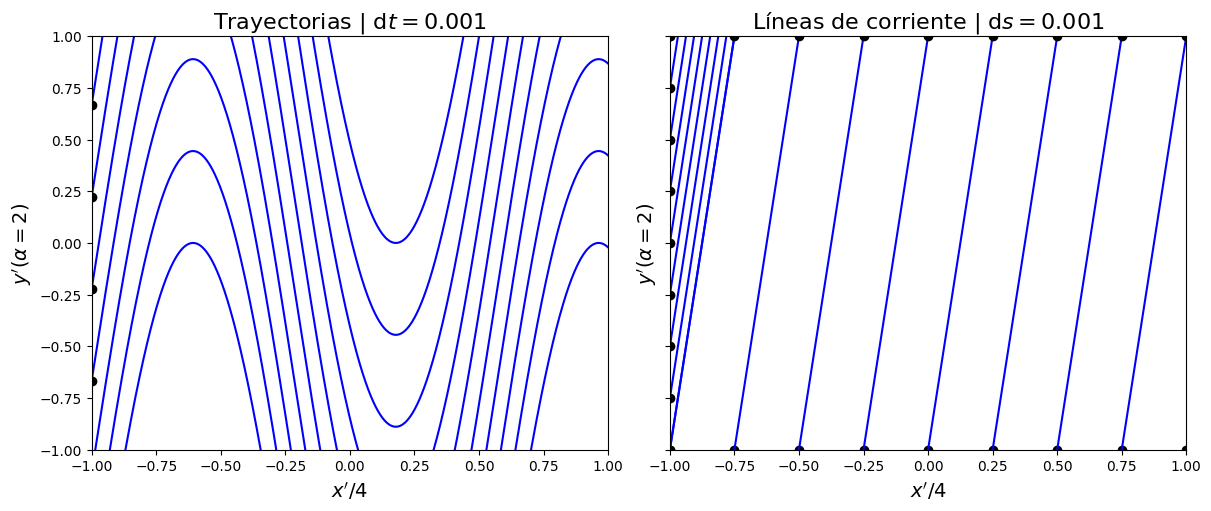

In [4]:

def u(X,t):
  return np.array([0.25, (2)*np.cos(t)])
N = 10000
dt = 1e-3
p0s = [[-1, a] for a in np.linspace(-2, 2, 10)]
p0s = np.array(p0s)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                              sharex=True, sharey=True)
for i in range(p0s.shape[0]):
  _, Xs = trayectoria(p0s[i], u, N, dt)
  ax1.plot(Xs[0,0], Xs[0,1], "ko")
  ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 15000
ds = 1e-3
l0s = [[-1, a] for a in np.linspace(-1, 1, 9)]
l0s = l0s + [[a, -1] for a in np.linspace(-1, 1, 9)]
l0s = l0s + [[a, 1]for a in np.linspace(-1, 1, 9)]
l0s = np.array(l0s)
for i in range(l0s.shape[0]):
  _, ls = linea_de_corriente(l0s[i], u, 0, N, ds)
  ax2.plot(ls[0,0], ls[0,1], "ko")
  ax2.plot(ls[:,0], ls[:,1], "b-")
ax1.set_xlim(-1,6)
ax1.set_ylim(-3,4)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)
ax1.set_xlabel('$x\'/4$', fontsize=14)
ax1.set_ylabel('$y\' (α = 2)$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$x\'/4$', fontsize=14)
ax2.set_ylabel('$y\' (α = 2)$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)

In [5]:
def evolucionar_lineas(l0s, ts, u, N, ds, ext=None, figsize=None):
  """
  Calcula numéricamente las líneas de campo y las grafica en
  un video a medida que avanza el tiempo. Asume que existe
  una funcion 'linea_de_corriente' previamente definida.

  Parámetros:
    l0s: Origen de las líneas cómo arreglo de dimensión (n,2)
    u  : Campo de velocidades cómo función de (x,t)
    ts : Tiempos para los cuales se calculan las líneas cómo
         arreglo de dimensión m
    N  : Número de pasos en s
    ds : Paso del parametrizador
    ext: Límites espaciales del grafico [xmin,xmax,ymin,ymax]
figsize: Tamaño de la figura
  """
  n = l0s.shape[0]   # Cantidad de líneas de corriente
  m = ts.shape[0]    # Cantidad de tiempos (fotogramas)
  ls = np.zeros((m, n, N+1, 2))
  for i in range(m):
    for j in range(n):
      _, ls[i,j] = linea_de_corriente(l0s[j], u, ts[i], N, ds)
  xs = ls[:,:,:,0]
  ys = ls[:,:,:,1]

  if ext is None:
    extent = [np.min(np.array(xs)), np.max(np.array(xs)),
              np.min(np.array(ys)), np.max(np.array(ys))]
  else:
    extent = ext

  # Guardo el estado de plt
  params_viejos = plt.rcParams
  plt.rc('animation', html='jshtml')

  fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
  plt.close();  # Cerrar la figura, animation va a crear la suya propia

  # Inicializo las curvas
  plots = [ ax.plot([], [], "b-")[0] for i in range(n) ]
  dots  = [ ax.plot([], [], "ko")[0] for i in range(n) ]
  ax.set_title("$t=0$")
  ax.set_xlabel("x")
  ax.set_ylabel("y")

  def init():
    """ Inicializador de la figura y gráfico de condiciones iniciales."""
    sup = 0
    for i, (x, y) in enumerate(zip(xs[0], ys[0])):
      dots[i].set_xdata([x[0]])
      dots[i].set_ydata([y[0]])
      sup = max(sup, max(np.max(np.abs(x)), np.max(np.abs(y))))

    ax.set_aspect('equal')
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])

    return plots

  def actualizar(t):
    """ Actualiza los datos al fotograma actual."""
    print(f"\rCalculando fotograma {t} de {m}",
          end="")

    for i, (x, y) in enumerate(zip(xs[t], ys[t])):
      plots[i].set_xdata(x)
      plots[i].set_ydata(y)

    ax.set_title(f"$t={ts[t]:.5f}$")

    return plots

  anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                 frames=range(0, m), blit=True, repeat=True)

  # Restauro el estado de plt
  plt.rc(params_viejos)

  return anim


def evolucionar_trazas(X0s, u, N, dt, paso=1, ext=None, figsize=None):
  """
  Calcula numéricamente las líneas de traza y las grafica
  en un video a medida que avanza el tiempo. Asume que
  existe una funcion 'esquema' previamente definida.

  Parámetros:
    X0s: Origen de las trazas cómo arreglo de dimensión (n,2)
    u  : Campo de velocidades cómo función de (x,t)
    N  : Número de pasos temporales
    dt : Paso temporal
   paso: Cantidad de pasos temporales entre fotogramas
    ext: Límites espaciales del grafico [xmin,xmax,ymin,ymax]
figsize: Tamaño de la figura
  """
  n = X0s.shape[0]   # Cantidad de líneas de traza
  ts = np.arange(N+1)*dt
  Xs = np.zeros((N+1, n, N+1, 2))
  for j in range(n):
    Xs[:, j] = X0s[None, j, None]
    for i in range(N):
      for k in range(i//paso+1):
        Xs[i+1, j, k] = esquema_RK(Xs[i, j, k], u, ts[i], dt)
  xs = Xs[:,:,:,0]
  ys = Xs[:,:,:,1]

  if ext is None:
    extent = [np.min(np.array(xs)), np.max(np.array(xs)),
              np.min(np.array(ys)), np.max(np.array(ys))]
  else:
    extent = ext

  # Guardo el estado de plt
  params_viejos = plt.rcParams
  plt.rc('animation', html='jshtml')

  fig, ax = plt.subplots(1, 1, figsize=figsize, constrained_layout=True)
  plt.close();  # Cerrar la figura, animation va a crear la suya propia

  # Inicializo las curvas
  plots = [ ax.plot([], [], "b-")[0] for i in range(n) ]
  dots  = [ ax.plot([], [], "ko")[0] for i in range(n) ]
  ax.set_title("$t=0$")
  ax.set_xlabel("x")
  ax.set_ylabel("y")

  def init():
    """ Inicializador de la figura y gráfico de condiciones iniciales."""
    sup = 0
    for i, (x, y) in enumerate(zip(xs[0], ys[0])):
      dots[i].set_xdata([x[0]])
      dots[i].set_ydata([y[0]])
      sup = max(sup, max(np.max(np.abs(x)), np.max(np.abs(y))))

    ax.set_aspect('equal')
    ax.set_xlim(extent[0], extent[1])
    ax.set_ylim(extent[2], extent[3])

    return plots

  def actualizar(t):
    """ Actualiza los datos al fotograma actual."""
    print(f"\rCalculando fotograma {t//paso} de {(N+1)//paso}", end="")

    for i, (x, y) in enumerate(zip(xs[t], ys[t])):
      plots[i].set_xdata(x)
      plots[i].set_ydata(y)

    ax.set_title(f"$t={ts[t]:.5f}$")

    return plots

  anim = animation.FuncAnimation(fig, actualizar, init_func=init,
                                 frames=range(0, N+1, paso),
                                 blit=True, repeat=True)

  # Restauro el estado de plt
  plt.rc(params_viejos)

  return anim

In [7]:
ts = np.linspace(0, 6, 30)
evolucionar_lineas(l0s, ts, u, N, ds, ext=[-1,1,-1,1], figsize=None)

KeyboardInterrupt: 

## ii) Campo de velocidades:
$$ \mathbf{u}(\mathbf{x}, t) = \frac{U_xx}{1 + (\beta t)} \hat{x} + U_y  \hat{y} $$

Sea $$ \mathbf{u'} = \frac{\mathbf{u}}{U_y} $$ $$t' = tβ$$ $$\mathbf{x'} = \frac{\mathbf{x}β}{U_y} $$ $$ x' = \frac{xα}{U_y}$$ la expresión completa adimensional resulta:

$$\mathbf{u'}(\mathbf{x'}, t') = \frac{x'}{1+t'}\hat{x} + 1\hat{y}$$



Text(0.5, 1.0, 'Líneas de corriente | d$s=0.001$')

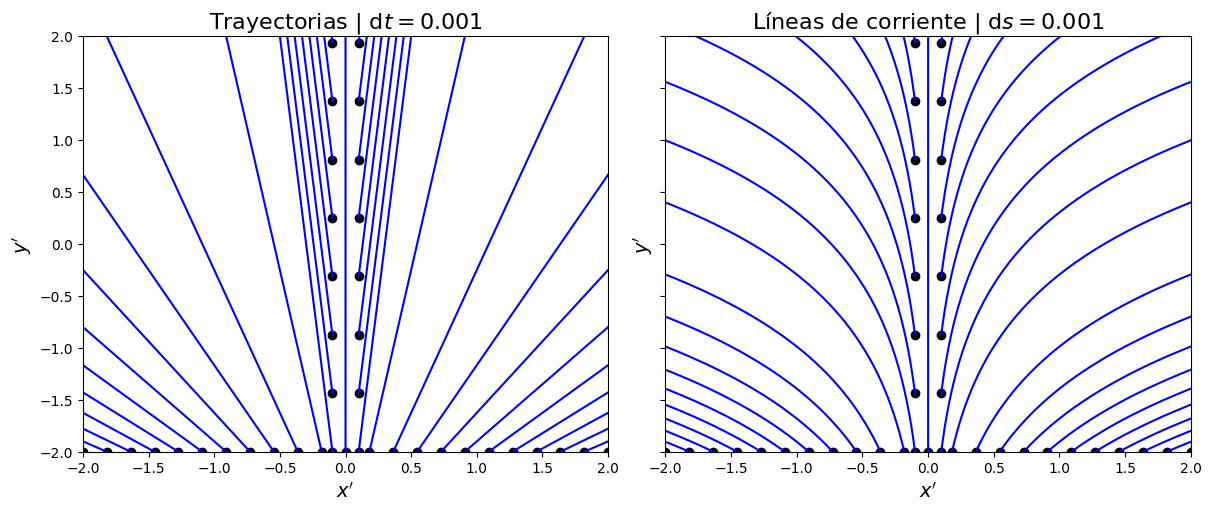

In [8]:
def u(X,t):
  return np.array([X[0]/(1+t), 1])
  N = 10000
dt = 1e-3
p0s = [[0,0]]
p0s = [[-0.1, a] for a in np.linspace(-2, 2.5, 9)]
p0s = p0s + [[a, -2] for a in np.linspace(-2, 2, 23)]
p0s = p0s + [[0.1, a] for a in np.linspace(-2, 2.5, 9)]
p0s = np.array(p0s)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)
for i in range(p0s.shape[0]):
  _, Xs = trayectoria(p0s[i], u, N, dt)
  ax1.plot(Xs[0,0], Xs[0,1], "ko")
  ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 15000
ds = 1e-3
l0s = [[0,0]]
l0s = [[-0.1, a] for a in np.linspace(-2, 2.5, 9)]
l0s = l0s + [[a, -2] for a in np.linspace(-2, 2, 23)]
l0s = l0s + [[0.1, a] for a in np.linspace(-2, 2.5, 9)]
l0s = np.array(l0s)
for i in range(l0s.shape[0]):
  _, ls = linea_de_corriente(l0s[i], u, 0, N, ds)
  ax2.plot(ls[0,0], ls[0,1], "ko")
  ax2.plot(ls[:,0], ls[:,1], "b-")
ax1.set_xlim(-2,2)
ax1.set_ylim(-2,2)
ax1.set_xlabel('$x\'$', fontsize=14)
ax1.set_ylabel('$y\'$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$x\'$', fontsize=14)
ax2.set_ylabel('$y\'$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)

In [9]:
ts = np.linspace(0, 6, 30)
evolucionar_lineas(l0s, ts, u, N, ds, ext=[-2,2,-2,2], figsize=None)

KeyboardInterrupt: 

## iii) Campo de velocidades:
$$\mathbf{u}(\mathbf{x}, t) = [\frac{Q}{ 2\pi x (1+(\frac{y}{x})^2)}+ U\frac{t}{\tau} ]\hat{x} +[\frac{Q}{ 2\pi y (1+(\frac{y}{x})^2)}+ U\frac{t}{\tau} ]\hat{y}$$
Sean $$\mathbf{u'} = \frac{2 π}{U}\mathbf{u}$$
$$t' = \frac{2 π}{τ}t$$
$$x' = \frac{U}{Q}x$$
$$y' = \frac{U}{Q}y$$

La expresión adimensional resulta:
$$\mathbf{u'}(\mathbf{x'}, t') =[\frac{1}{x'(1 + (\frac{y'}{x'})^2)} + t']\hat{x} + [\frac{1}{y'(1 + (\frac{x'}{y'})^2)} + t']\hat{y}$$




/tmp/ipython-input-10-539261919.py:2: RuntimeWarning: divide by zero encountered in scalar divide
  return np.array([1/(X[0]+X[1]**2/X[0]) - t, 1/(X[1]+X[0]**2/X[1]) + t])


Text(0.5, 1.0, 'Líneas de corriente | d$s=0.01$')

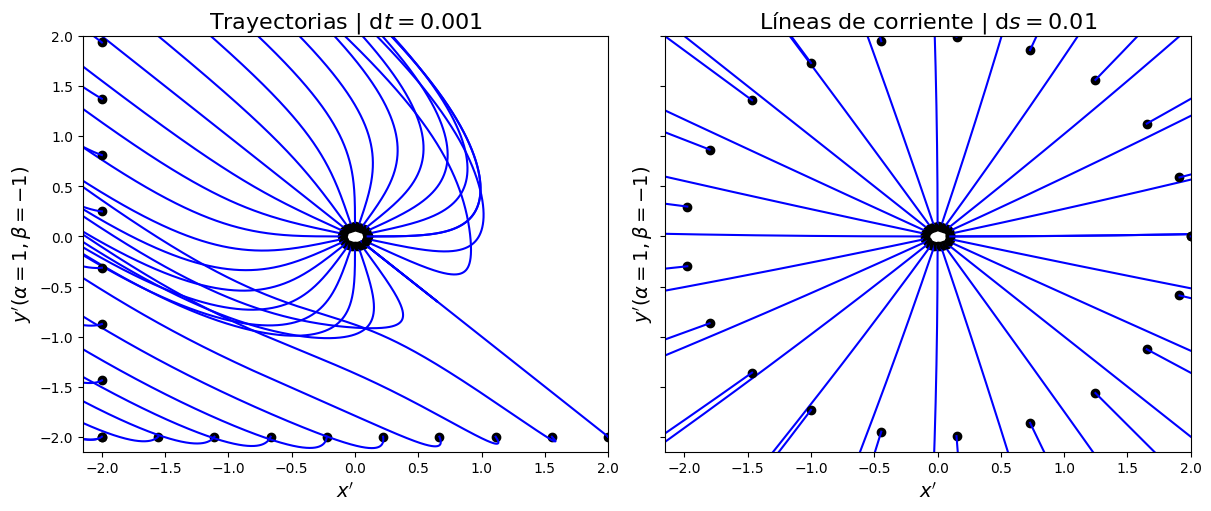

In [10]:
def u(X,t):
  return np.array([1/(X[0]+X[1]**2/X[0]) - t, 1/(X[1]+X[0]**2/X[1]) + t])
N = 10000
dt = 1e-3
#p0s = [[-0.1, a] for a in np.linspace(-2, 2.5, 9)]
p0s = [[a, -2] for a in np.linspace(-2, 2, 10)]
p0s = p0s + [[0.1*np.cos(a), 0.1*np.sin(a)] for a in np.linspace(0, 2*np.pi, 25)]
p0s = p0s + [[-2, a] for a in np.linspace(-2, 2.5, 9)]
p0s = np.array(p0s)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)
for i in range(p0s.shape[0]):
  _, Xs = trayectoria(p0s[i], u, N, dt)
  ax1.plot(Xs[0,0], Xs[0,1], "ko")
  ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 15000
ds = 1e-2
l0s =  [[0.1*np.cos(a), 0.1*np.sin(a)] for a in np.linspace(0, 2*np.pi, 25)]
l0s = l0s + [[2*np.cos(a), 2*np.sin(a)] for a in np.linspace(0, 2*np.pi, 22)]
l0s = np.array(l0s)
for i in range(l0s.shape[0]):
  _, ls = linea_de_corriente(l0s[i], u, 0.001, N, ds)
  ax2.plot(ls[0,0], ls[0,1], "ko")
  ax2.plot(ls[:,0], ls[:,1], "b-")
ax1.set_xlim(-2.15,2)
ax1.set_ylim(-2.15,2)
ax1.set_xlabel('$x\'$', fontsize=14)
ax1.set_ylabel('$y\' (α = 1, β = -1)$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$x\'$', fontsize=14)
ax2.set_ylabel('$y\' (α = 1, β = -1)$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)

In [ ]:
ts = np.linspace(0.01, 6, 24)
evolucionar_lineas(l0s, ts, u, N, ds, ext=[-2,2,-2,2], figsize=None)

## iv) Campo de velocidades:
$$\mathbf{u}(\mathbf{r}, t) = -\frac{Q}{2 π r}\hat{r} + \frac{Γ}{2 π r}e^{-\frac{t}{τ}}\hat{θ}$$

Sean
$$\mathbf{u'} = \frac{2 π}{Q}u$$
$$r' =r$$
$$t' = \frac{t}{τ}$$
$$α = \frac{Γ}{Q}$$
Con α adimensional. La expresion adimensional resulta:
$$\mathbf{u'}(\mathbf{r'}, t') = -\frac{1}{r'}\hat{r} + \frac{α}{r'}e^{-t'}\hat{θ} $$


/tmp/ipython-input-11-3435853721.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return np.array([- 1/(X[0] + X[1]**2/X[0]) - (0.5)*np.exp(-t)/(X[1] + X[0]**2/X[1]), (0.5)*np.exp(-t)/(X[0] + X[1]**2/X[0]) - 1/(X[1] + X[0]**2/X[1])])


Text(0.5, 1.0, 'Líneas de corriente | d$s=0.001$')

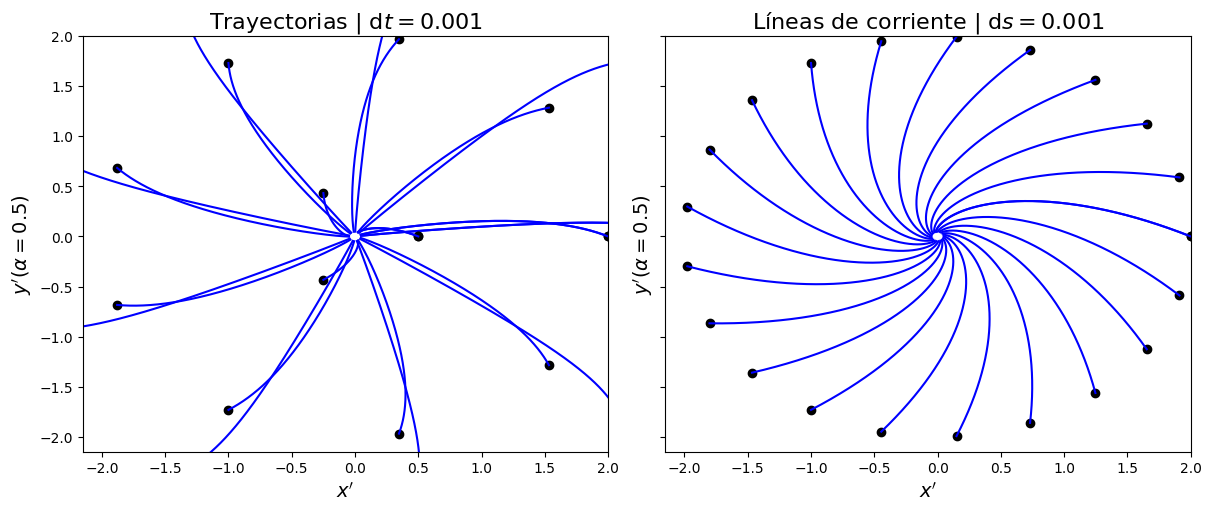

In [11]:
def u(X,t):
  if np.sqrt(X[0]**2 + X[1]**2)<= 0.05:
    return np.array([0,0])
  else:
    return np.array([- 1/(X[0] + X[1]**2/X[0]) - (0.5)*np.exp(-t)/(X[1] + X[0]**2/X[1]), (0.5)*np.exp(-t)/(X[0] + X[1]**2/X[0]) - 1/(X[1] + X[0]**2/X[1])])
#    return np.array([(-X[0]-X[1]*3*np.exp(-t))/(X[0]**2+X[1]**2), (-X[1]+ X[0]*3*np.exp(-t))/(X[0]**2+X[1]**2) ])

N = 10000
dt = 1e-3
#p0s = [[-0.1, a] for a in np.linspace(-2, 2.5, 9)]
#p0s = [[a, -2] for a in np.linspace(-2, 2, 10)]
p0s = [[2*np.cos(a), 2*np.sin(a)] for a in np.linspace(0, 2*np.pi, 10)]
p0s = p0s + [[2.7*np.cos(a), 2.7*np.sin(a)] for a in np.linspace(0, 2*np.pi, 10)]
p0s = p0s + [[0.5*np.cos(a), 0.5*np.sin(a)] for a in np.linspace(0, 2*np.pi, 4)]
#p0s = p0s + [[-2, a] for a in np.linspace(-2, 2.5, 9)]
p0s = np.array(p0s)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                               sharex=True, sharey=True)
for i in range(p0s.shape[0]):
  _, Xs = trayectoria(p0s[i], u, N, dt)
  ax1.plot(Xs[0,0], Xs[0,1], "ko")
  ax1.plot(Xs[:,0], Xs[:,1], "b-")

N = 15000
ds = 1e-3
l0s = [[2*np.cos(a), 2*np.sin(a)] for a in np.linspace(0, 2*np.pi, 22)]
#l0s =l0s + [[0.1*np.cos(a), 0.1*np.sin(a)] for a in np.linspace(0, 2*np.pi, 25)]
l0s = np.array(l0s)
for i in range(l0s.shape[0]):
  _, ls = linea_de_corriente(l0s[i], u, 0, N, ds)
  ax2.plot(ls[0,0], ls[0,1], "ko")
  ax2.plot(ls[:,0], ls[:,1], "b-")
ax1.set_xlim(-2.15,2)
ax1.set_ylim(-2.15,2)
ax1.set_xlabel('$x\'$', fontsize=14)
ax1.set_ylabel('$y\' (α = 0.5)$', fontsize=14)
ax1.set_title(f'Trayectorias | d$t={dt}$', fontsize=16)
ax2.set_xlabel('$x\'$', fontsize=14)
ax2.set_ylabel('$y\' (α = 0.5)$', fontsize=14)
ax2.set_title(f'Líneas de corriente | d$s={ds}$', fontsize=16)

In [ ]:
ts = np.linspace(0,1, 6, 24)
evolucionar_lineas(l0s, ts, u, N, ds, ext=[-2,2,-2,2], figsize=None)

#Ejercicio 12

## (v) Resolución numérica de la ecuación (iii):
\begin{equation}
\frac{d x(\xi)}{d \xi} = y(\xi)
\end{equation}
\begin{equation}
\frac{d y(\xi)}{d \xi} = - x^n(\xi) - \frac{2}{\xi} y(\xi)
\end{equation}

Es decir:

\begin{equation}
  \mathbf{u}(\mathbf{x},\xi) = y \hat{\mathbf{x}} - \left({x^n + \frac{2}{\xi} y}\right) \hat{\mathbf{y}}
\end{equation}

In [17]:
def F(X,t):
  return np.array([X[1] , -X[0] - X[1]*2/t])
p0 = np.array([[1,0]])

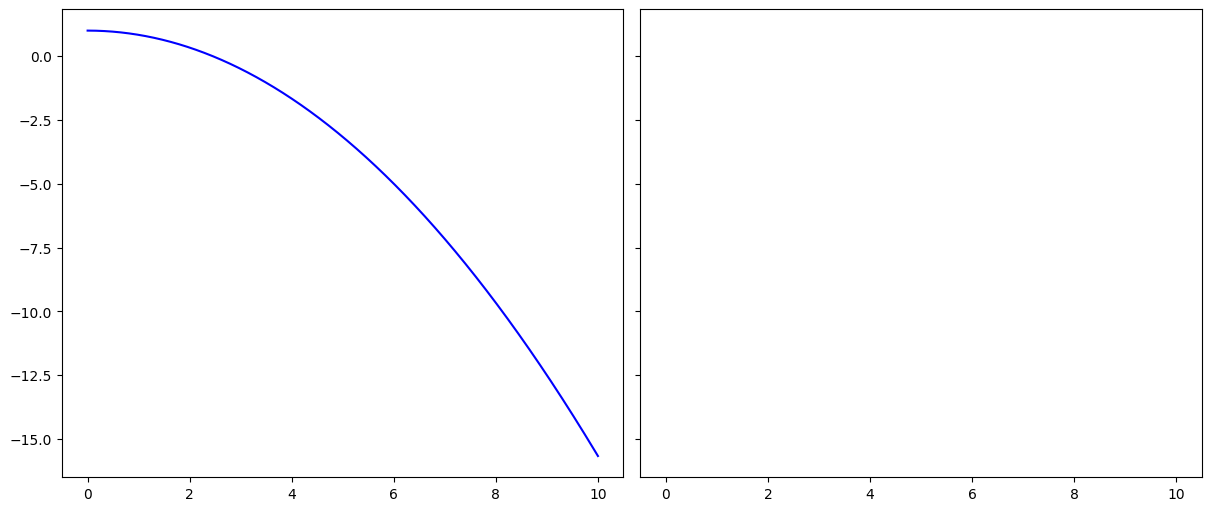

In [18]:
def esquema_RK(X, u, t, dt):
  k1 = u(X,t)
  k2 = u(X + (dt/2)*k1 , t + (dt/2))
  k3 = u(X + (dt/2)*k2 , t + (dt/2))
  k4 = u(X + dt*k3 , t + dt)
  RK = X + (dt/6)*(k1 + 2*k2 + 2*k3 + k4)
  return RK
def trayectoria(X0, u, N, dt):
  """
  Calcula numéricamente la solución a dX/ds = u(X,t) cómo
  un arreglo, usando el esquema definido previamente

  Parámetros:
    X0: Condición inicial cómo arreglo de dimensión d
    u : Campo de velocidades cómo función de (x,t)
    N : Número de pasos temporales
    dt: Paso temporal
  """
  d = X0.shape[0]            # Dimensión del problema
  ts = np.arange(0.00001, N+1)*dt  # Tiempos donde calcularé la solución
  Xs = np.zeros((N+1, d))    # Solución aproximada
  Xs[0] = X0                 # Impongo la condición inicial a t=0
  for j in range(N):
    # Aplico esquema anterior sobre Xs[j] para obtener Xs[j+1]
    Xs[j+1] = esquema_RK(Xs[j], u, ts[j], dt)
  return ts, Xs


ts = np.arange(0.00001, N+1)*dt

def F(X,t):
 return np.array([X[1] , -X[0]**0 - X[1]*2/t])
p0 = np.array([[1,0]])
N = 10000
dt = 1e-3
#p0s = [[-1, a] for a in np.linspace(-2, 2, 10)]
#p0s = np.array(p0s)


fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(12,5), constrained_layout=True,
                              sharex=True, sharey=True)
for j in range(p0.shape[0]):
  _, Xs = trayectoria(p0[j], F, N, dt)
  ax1.plot(ts[:], Xs[:,0],"b-")



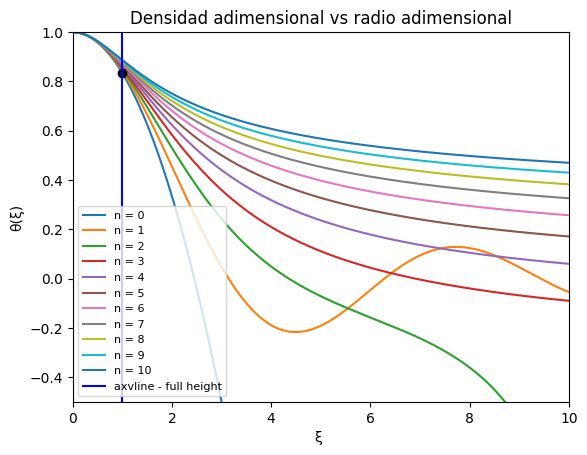

In [15]:
def F_1(X,t):
 return np.array([X[1] , -X[0]**1 - X[1]*2/t])
def F_2(X,t):
 return np.array([X[1] , -X[0]**2 - X[1]*2/t])
def F_3(X,t):
 return np.array([X[1] , -X[0]**3 - X[1]*2/t])
def F_4(X,t):
 return np.array([X[1] , -X[0]**4 - X[1]*2/t])
def F_5(X,t):
 return np.array([X[1] , -X[0]**5 - X[1]*2/t])
def F_6(X,t):
 return np.array([X[1] , -X[0]**6 - X[1]*2/t])
def F_7(X,t):
 return np.array([X[1] , -X[0]**7 - X[1]*2/t])
def F_8(X,t):
 return np.array([X[1] , -X[0]**8 - X[1]*2/t])
def F_9(X,t):
 return np.array([X[1] , -X[0]**9 - X[1]*2/t])
def F_10(X,t):
 return np.array([X[1] , -X[0]**10 - X[1]*2/t])
_, Xs_0 = trayectoria(p0[0], F, N, dt)
_, Xs_1 = trayectoria(p0[0], F_1, N, dt)
_, Xs_2 = trayectoria(p0[0], F_2, N, dt)
_, Xs_3 = trayectoria(p0[0], F_3, N, dt)
_, Xs_4 = trayectoria(p0[0], F_4, N, dt)
_, Xs_5 = trayectoria(p0[0], F_5, N, dt)
_, Xs_6 = trayectoria(p0[0], F_6, N, dt)
_, Xs_7 = trayectoria(p0[0], F_7, N, dt)
_, Xs_8 = trayectoria(p0[0], F_8, N, dt)
_, Xs_9 = trayectoria(p0[0], F_9, N, dt)
_, Xs_10 = trayectoria(p0[0], F_10, N, dt)
plt.plot(ts[:], Xs_0[:,0], label= ('n = 0'))
plt.plot(ts[:], Xs_1[:,0], label='n = 1')
plt.plot(ts[:], Xs_2[:,0], label='n = 2')
plt.plot(ts[:], Xs_3[:,0], label='n = 3')
plt.plot(ts[:], Xs_4[:,0], label= ('n = 4'))
plt.plot(ts[:], Xs_5[:,0], label='n = 5')
plt.plot(ts[:], Xs_6[:,0], label='n = 6')
plt.plot(ts[:], Xs_7[:,0], label='n = 7')
plt.plot(ts[:], Xs_8[:,0], label='n = 8')
plt.plot(ts[:], Xs_9[:,0], label='n = 9')
plt.plot(ts[:], Xs_10[:,0], label='n = 10')
plt.plot(ts[1000],Xs_0[1000,0],'ko')
plt.axvline(x = 1, color = 'b', label = 'axvline - full height')
plt.title("Densidad adimensional vs radio adimensional")
plt.xlim(0,10)
plt.ylim(-0.5,1)
plt.xlabel('ξ ')
plt.ylabel('θ(ξ)')
plt.legend(loc='best', fontsize = 8)
plt.show()
# Claramente no tenia ganas de pensar un ciclo

# vi)
Interpretando que se llega a la masa total en ξ = 1, y tomando $$M_0 = 4 π a^3ρ_c/3$$

me queda
$$\frac{M_t}{M_0}(n) = -3(ξ=1)^2 (\frac{d θ(ξ = 1)}{dξ})^n$$

Dado que consideramos los n como numero naturales, el grafico será punteado.

[[ 0.83333333 -0.33333334]
 [ 0.84147098 -0.30116868]
 [ 0.84865411 -0.27453943]
 [ 0.85505757 -0.25212928]
 [ 0.86081381 -0.23300964]
 [ 0.8660254  -0.21650635]
 [ 0.87077325 -0.20211793]
 [ 0.8751222  -0.18946354]
 [ 0.87912496 -0.17824868]
 [ 0.88282491 -0.16824203]
 [ 0.88625812 -0.15925929]]


/tmp/ipython-input-16-2682620176.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.plot(n[:],-3*X_pr[:,1], 'ko',color='blue')


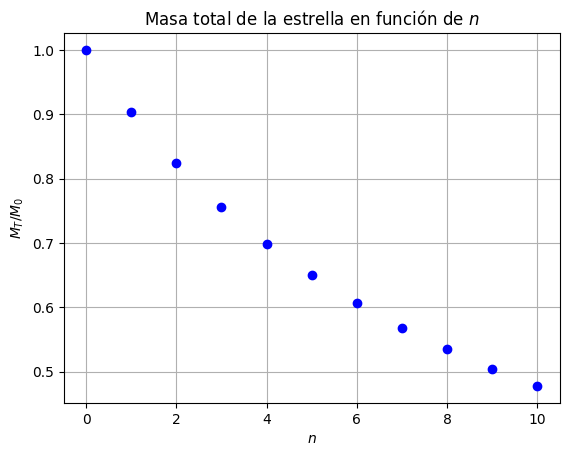

In [16]:
X_pr = np.array([Xs_0[1000],Xs_1[1000],Xs_2[1000],Xs_3[1000],Xs_4[1000],Xs_5[1000],Xs_6[1000],Xs_7[1000],Xs_8[1000],Xs_9[1000],Xs_10[1000]])
n = np.arange(0,11)
plt.plot(n[:],-3*X_pr[:,1], 'ko',color='blue')
plt.xlabel('$n$')
plt.ylabel('$M_T/M_0$')
plt.title("Masa total de la estrella en función de $n$")
plt.grid()
print(X_pr)